In [4]:
## Basically copy of https://github.com/DARPA-ASKEM/program-milestones/blob/main/6-month-milestone/evaluation/scenario_1/ta_2/scenario1_stratify_v3.ipynb

using AlgebraicPetri, AlgebraicPetri.TypedPetri
using Catlab.CategoricalAlgebra
using GraphViz

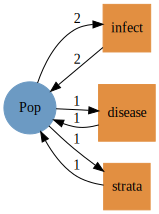

In [5]:
const infectious_ontology = LabelledPetriNet(
  [:Pop],
  :infect=>((:Pop, :Pop)=>(:Pop, :Pop)),
  :disease=>(:Pop=>:Pop),
  :strata=>(:Pop=>:Pop)
)

Graph(infectious_ontology)

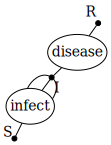

In [6]:
using Catlab.Programs, Catlab.Graphics

sir_uwd = @relation () where (S::Pop, I::Pop, R::Pop) begin
  infect(S,I,I,I) # inf
  disease(I,R) # rem
end

typed_sir = oapply_typed(infectious_ontology, sir_uwd, [:inf, :rem])

to_graphviz(sir_uwd, box_labels=:name, junction_labels=:variable)

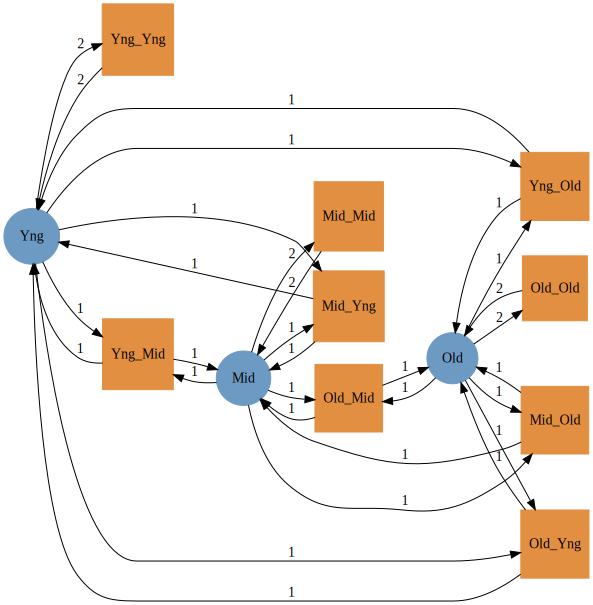

In [7]:
typed_age = pairwise_id_typed_petri(infectious_ontology, :Pop, :infect, [:Yng, :Mid, :Old])

Graph(dom(typed_age))

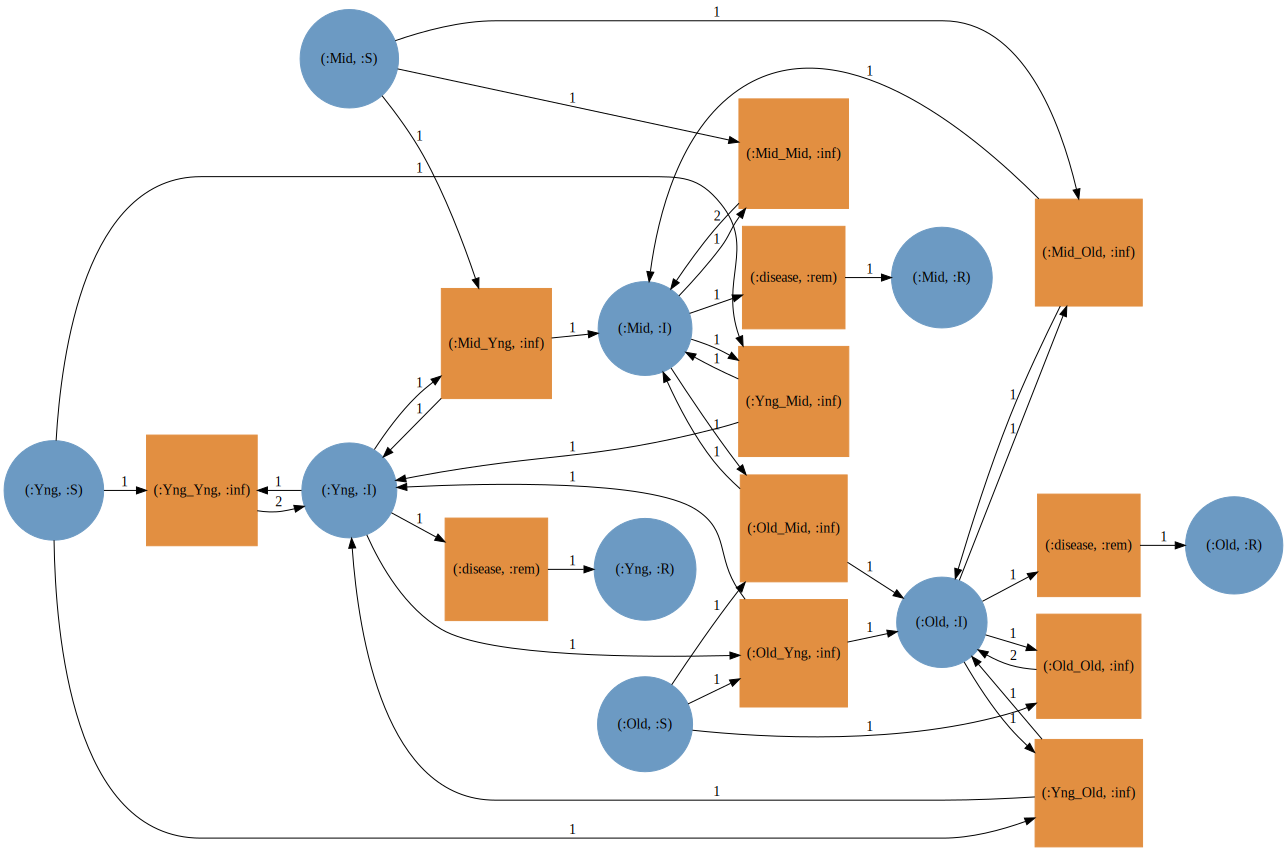

In [8]:
typed_age_aug = add_reflexives(
  typed_age,
  [[:disease], [:disease], [:disease]],
  infectious_ontology
)

typed_sir_aug = add_reflexives(
  typed_sir,
  [[:strata], [:strata], [:strata]],
  infectious_ontology
)

stratified = typed_product(typed_age_aug, typed_sir_aug)

Graph(dom(stratified))